# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [103]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [104]:
browser = Browser('chrome')

## Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.


In [105]:
# Visit the website: https://static.bc-edx.com/data/web/mars_facts/temperature.html

url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
html = browser.html

## Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [106]:
# Create a Beautiful Soup Object
Mars_temp_soup = soup(html, "html.parser")

In [107]:
# Extract all rows of data
Mars_temp_table = Mars_temp_soup.find_all("tr", class_= "data-row")
Mars_temp_table

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

## Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [108]:
# identify the header
header = [n.text for n in Mars_temp_soup.find_all("th")]
header

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [109]:
# Create an empty list
data = []
# Loop through the scraped data to create a list of rows
for row in range(len(Mars_temp_table)):
    row_items = Mars_temp_table[row].find_all("td") # extract all items from each row
    row_list = [] # create a new list for each row
    # create a loop for each row
    for item in range(len(row_items)):
        # extract each item from each row and the single item into row_list
        row_item = row_items[item].text 
        row_list.append(row_item)
    data.append(row_list)
data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [110]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df_Mars_temp = pd.DataFrame.from_records(data, columns= header)
df_Mars_temp

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


## Prepare Dataset for analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.


In [111]:
# Examine data type of each column
df_Mars_temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [112]:
# Change data types for data analysis
df_Mars_temp = df_Mars_temp.astype({"id": int, 
                                    "sol": int,
                                    "ls": int,
                                    "month": int,
                                    "min_temp": float,
                                     "pressure": float})
df_Mars_temp["terrestrial_date"] = pd.to_datetime(df_Mars_temp["terrestrial_date"], format= "%Y-%m-%d")

In [113]:
# Confirm type changes were successful by examining data types again
df_Mars_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


## Analyse Mars Weather Data
---

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [114]:
# 1. How many months are there on Mars?
months = df_Mars_temp["month"].nunique()
print(f"There are {months} months in Mars")

There are 12 months in Mars


In [115]:
# 2. How many Martian days' worth of data are there?
Martian_days = df_Mars_temp["sol"].nunique()
Martian_days

1867

In [116]:
# 3. What is the average low temperature by month?
df_temp_month = df_Mars_temp.loc[:,["month", "min_temp"]] # extract the required columns
grp_month_temp = df_temp_month.groupby(["month"]).mean()
grp_month_temp

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


Text(0.5, 1.04, 'Monthly average minimum temperature in Mars')

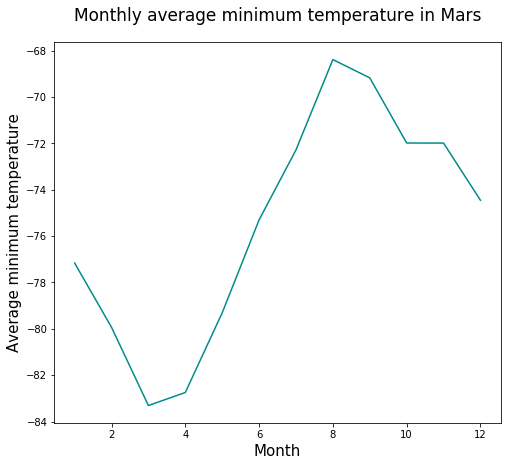

In [117]:
# Plot the average temperature by month
plt.figure(figsize=(8, 7))
plt.plot(grp_month_temp.index, grp_month_temp["min_temp"], color= "darkcyan")

plt.xlabel("Month", fontsize=15)
plt.ylabel("Average minimum temperature", fontsize=15)
plt.title("Monthly average minimum temperature in Mars", fontsize=17, y = 1.04)

In [118]:
# Identify the coldest and hottest months in Curiosity's location
warmest_month = grp_month_temp.loc[(grp_month_temp["min_temp"] == grp_month_temp["min_temp"].max()), :]
coldest_month = grp_month_temp.loc[(grp_month_temp["min_temp"] == grp_month_temp["min_temp"].min()), :]
print(f"The warmest month on Mars is {warmest_month.index[0]} (Temperature: {warmest_month.min_temp.max()})")
print(f"The coldest month on Mars is {coldest_month.index[0]} (Temperature: {coldest_month.min_temp.min()})")

The warmest month on Mars is 8 (Temperature: -68.38297872340425)
The coldest month on Mars is 3 (Temperature: -83.30729166666667)


In [119]:
# 4. Average pressure by Martian month
df_press_month = df_Mars_temp.loc[:,["month", "pressure"]] # extract the required columns
grp_month_press = df_press_month.groupby(["month"]).mean()
grp_month_press

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


Text(0.5, 1.04, 'Monthly average pressure in Mars')

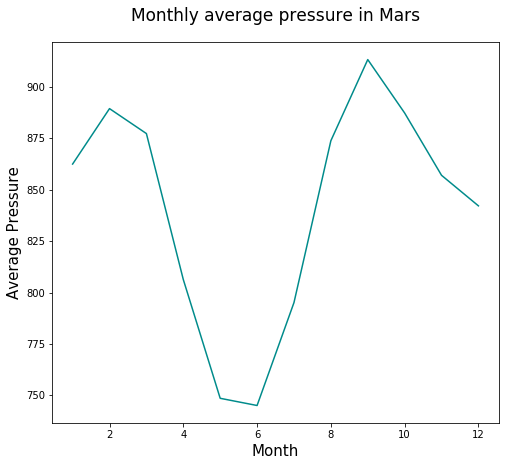

In [120]:
# Plot the average pressure by month
# Plot the average temperature by month
plt.figure(figsize=(8, 7))
plt.plot(grp_month_press.index, grp_month_press["pressure"], color= "darkcyan")

plt.xlabel("Month", fontsize=15)
plt.ylabel("Average Pressure", fontsize=15)
plt.title("Monthly average pressure in Mars", fontsize=17, y = 1.04)

Text(0, 0.5, 'Solar longitude')

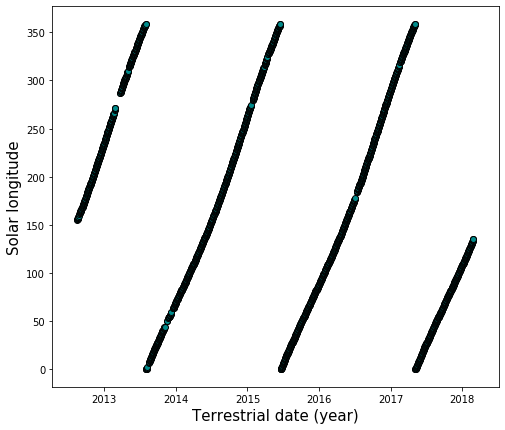

In [121]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.figure(figsize=(8, 7))
plt.scatter(df_Mars_temp["terrestrial_date"], df_Mars_temp["ls"], color= "darkcyan", edgecolors= "black")

plt.xlabel("Terrestrial date (year)", fontsize=15)
plt.ylabel("Solar longitude", fontsize=15)


In [122]:
# to find the terrestrial days in a Martian year, solar longitude is used (when ~ 360 will be a year) -> biggest different in ls column 
# -> the date finished a Martian year
df_Mars_temp["year_gap"] = df_Mars_temp["ls"].diff() # add a column that find the difference between the current row and the previous row in ls column
max_year_gap = df_Mars_temp.loc[(df_Mars_temp["year_gap"] == df_Mars_temp["year_gap"].min()), :] # get the values that have the most different
days = max_year_gap["terrestrial_date"].diff() # subtract the terrestrial date column to find the number of days in a Martian year

print(f"There are {days.iloc[1].days} terrestrial days in a Martian year")

There are 687 terrestrial days in a Martian year


## Conclusion
---
On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.


## Save Data
---
Export the DataFrame to a CSV file.

In [125]:
# remove the columns year gap before save
df_Mars_temp.drop(columns= "year_gap")

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [126]:
# Write the data to a CSV
df_Mars_temp.to_csv("export/Mars_weather.csv", index= False)

In [124]:
browser.quit()